In [179]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd


In [180]:
acoes = {
    'ITAUSA':yf.Ticker('ITSA4.SA'),
    'VALE':yf.Ticker('VALE3.SA'),
    'B3':yf.Ticker('B3SA3.SA'),
    'FLEURY':yf.Ticker('FLRY3.SA'),
    'BANCO DO BRASIL':yf.Ticker('BBAS3.SA'),
    'HYPERA':yf.Ticker('HYPE3.SA'),
    'RAIA DROGASIL':yf.Ticker('RADL3.SA'),
    'WEG':yf.Ticker('WEGE3.SA'),
    'PETROBRAS':yf.Ticker('PETR4.SA'),
    'ALUPAR':yf.Ticker('ALUP11.SA'),
    'COPEL':yf.Ticker('CPLE6.SA'),
    'MULTIPLAN':yf.Ticker('MULT3.SA'),
    'TELEFÔNICA':yf.Ticker('VIVT3.SA'),
    'AMBEV':yf.Ticker('ABEV3.SA'),
    'ENGIE':yf.Ticker('EGIE3.SA'),
    'SABESP':yf.Ticker('SBSP3.SA'),
    'BTG PACTUAL':yf.Ticker('BPAC11.SA'),
    'EMBRAER':yf.Ticker('EMBR3.SA'),
    'EZTEC':yf.Ticker('EZTC3.SA'),
    'AREZZO':yf.Ticker('ARZZ3.SA')
}

In [181]:
acoes_portfolio ={
    'ITAUSA':yf.Ticker('ITSA4.SA'),
    'B3':yf.Ticker('B3SA3.SA'),
    'FLEURY':yf.Ticker('FLRY3.SA'),
    'WEG':yf.Ticker('WEGE3.SA')
    }

In [182]:
data_acoes = []
for acao in acoes:
    data = {}
    data['Ação'] = acao
    data['Valor investido'] = 1000
    data['Quantidade'] = data['Valor investido'] / acoes[acao].history(period='5y').iloc[0]['Close']
    data['Valor final'] = data['Quantidade'] * acoes[acao].history(period='5y').iloc[-1]['Close']
    data['Rentabilidade geral'] = (data['Valor final'] / data['Valor investido'] - 1)
    data['Valor por dia'] = data['Quantidade'] * acoes[acao].history(period='5y')['Close']
    data['Rentabilidade diária'] = data['Valor por dia'].ffill(axis=0).pct_change()
    data['Desvio padrão diário'] = data['Rentabilidade diária'].std()
    data['Índice Sharpee'] = data['Rentabilidade geral'] / data['Desvio padrão diário']
    data_acoes.append(data)



In [183]:
portfolio = 0
for i in range(len(data_acoes)):
    portfolio += data_acoes[i]['Valor por dia']
# portfolio = (data_acoes[0]['Valor por dia'] + data_acoes[1]['Valor por dia'] + data_acoes[2]['Valor por dia'] + data_acoes[3]['Valor por dia'])


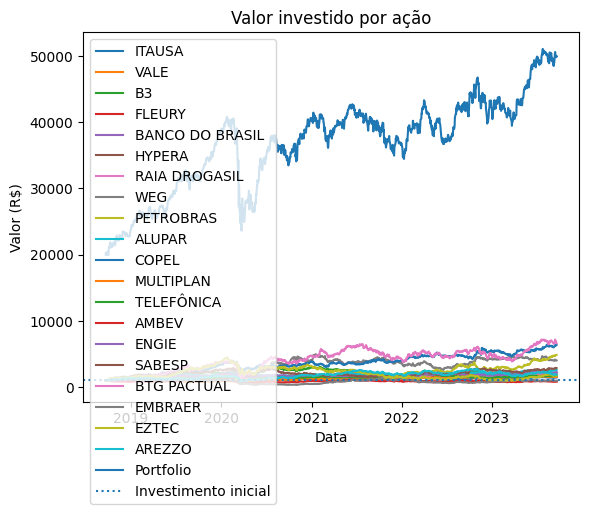

In [184]:
plt.figure()
for i in range(len(data_acoes)):
    plt.plot(data_acoes[i]['Valor por dia'], label=data_acoes[i]['Ação'])
plt.plot(portfolio, label='Portfolio')
plt.axhline(data['Valor investido'], linestyle=':', label='Investimento inicial')
plt.title('Valor investido por ação')
plt.ylabel('Valor (R\$)')
plt.xlabel('Data')
plt.legend()
plt.show()

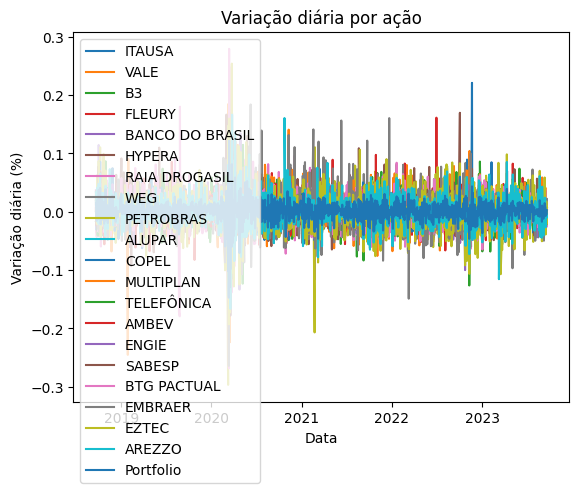

In [185]:
plt.figure()
for i in range(len(data_acoes)):
    plt.plot(data_acoes[i]['Rentabilidade diária'], label=data_acoes[i]['Ação'])
plt.plot(portfolio.ffill(axis=0).pct_change(), label='Portfolio')
plt.title('Variação diária por ação')
plt.ylabel('Variação diária (%)')
plt.xlabel('Data')
plt.legend()
plt.show()

In [187]:
for acao in data_acoes:
    print(acao['Ação'])
    print('Valor investido: R$ {:.2f}'.format(acao['Valor investido']))
    print('Valor final: R$ {:.2f}'.format(acao['Valor final']))
    print('Rentabilidade geral: {:.2f}%'.format(acao['Rentabilidade geral'] * 100))
    print('Índice Sharpee: {:.2f}'.format(acao['Índice Sharpee']))
    print('')
print('Portfolio')
print('Valor investido: R$ {:.2f}'.format(1000 * len(data_acoes)))
print('Valor final: R$ {:.2f}'.format(portfolio.iloc[-1]))
print('Rentabilidade geral: {:.2f}%'.format((portfolio.iloc[-1] / (1000 * len(data_acoes)) - 1) * 100)) 
print('Índice Sharpee: {:.2f}'.format((portfolio.iloc[-1] / (1000 * len(data_acoes)) - 1) / portfolio.ffill(axis=0).pct_change().std()))


ITAUSA
Valor investido: R$ 1000.00
Valor final: R$ 1438.06
Rentabilidade geral: 43.81%
Índice Sharpee: 23.27

VALE
Valor investido: R$ 1000.00
Valor final: R$ 1696.04
Rentabilidade geral: 69.60%
Índice Sharpee: 27.13

B3
Valor investido: R$ 1000.00
Valor final: R$ 2101.52
Rentabilidade geral: 110.15%
Índice Sharpee: 41.31

FLEURY
Valor investido: R$ 1000.00
Valor final: R$ 829.68
Rentabilidade geral: -17.03%
Índice Sharpee: -7.65

BANCO DO BRASIL
Valor investido: R$ 1000.00
Valor final: R$ 2248.88
Rentabilidade geral: 124.89%
Índice Sharpee: 49.90

HYPERA
Valor investido: R$ 1000.00
Valor final: R$ 1587.05
Rentabilidade geral: 58.71%
Índice Sharpee: 26.91

RAIA DROGASIL
Valor investido: R$ 1000.00
Valor final: R$ 1919.28
Rentabilidade geral: 91.93%
Índice Sharpee: 45.21

WEG
Valor investido: R$ 1000.00
Valor final: R$ 4021.73
Rentabilidade geral: 302.17%
Índice Sharpee: 126.47

PETROBRAS
Valor investido: R$ 1000.00
Valor final: R$ 4845.19
Rentabilidade geral: 384.52%
Índice Sharpee: 13